In [152]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from collections import Counter
import matplotlib
from matplotlib.colors import ListedColormap
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

current_palette = sns.color_palette()
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

sns.set(rc={'figure.figsize':(10,4)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def save_fig(ax, folder, suffix, format="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig(folder + suffix + "." + format)
    fig.clear()

In [168]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
locations = pd.read_csv(os.path.join("..", "eu_cities.csv"))
locations = locations[["city_ascii", "lng", "lat"]]
locations.rename(columns = {"city_ascii": "Client", "lng": "Longitude", "lat": "Latitude"}, inplace=True)

In [154]:
RESULTS_DIR = os.path.join("..", "results")
FILENAME = "results-"

In [155]:
df_paper = pd.DataFrame()

for experiment in ["cloud", "sat"]:
    for run in ["3"]: #for run in ["1", "2", "3"]:
        NAME = FILENAME + experiment + "-" + run
        files = os.listdir(os.path.join(".", RESULTS_DIR, NAME))

        df_experiment = pd.DataFrame()

        for f in files:
            if f.endswith("-history.csv"):
                client = f[2:-len(".ext4-history.csv")]
                # print(client)
                df_client = pd.read_csv(os.path.join(".", RESULTS_DIR, NAME, f))
                df_client.dropna(inplace=True)
                df_run = df_client[["Timestamp", "Type", "Name", "50%", "90%", "Total Median Response Time", "Total Average Response Time"]].copy()

                df_run["Client"] = client
                df_run["Experiment"] = experiment
                df_run["Run"] = run
                df_run["Latitude"] = locations.loc[locations["Client"] == client, "Latitude"].values[0]
                df_run["Longitude"] = locations.loc[locations["Client"] == client, "Longitude"].values[0]
                df_experiment = df_experiment.append(df_run)

        df_experiment["Timestamp"] = df_experiment["Timestamp"] - min(df_experiment["Timestamp"])
        start_time = max(df_experiment["Timestamp"]) - 1000
        df_experiment = df_experiment[ (df_experiment["Timestamp"] >  start_time) & (df_experiment["Timestamp"] < start_time+900) ]
        df_experiment["Timestamp"] = df_experiment["Timestamp"] - min(df_experiment["Timestamp"])

        df_paper = df_paper.append(df_experiment)

df_paper.head()


,Timestamp,Type,Name,50%,90%,Total Median Response Time,Total Average Response Time,Client,Experiment,Run,Latitude,Longitude
1683,0.0,GET,/,19000.0,19000.0,290.0,714.211111,Malaga,cloud,3,36.7194,-4.42
1684,0.0,POST,/,0.0,0.0,490.0,889.812500,Malaga,cloud,3,36.7194,-4.42
1685,0.0,GET,/auth/find-friends/,250.0,260.0,240.0,366.386792,Malaga,cloud,3,36.7194,-4.42
1686,0.0,GET,/auth/login/,0.0,0.0,110.0,110.000000,Malaga,cloud,3,36.7194,-4.42
1687,0.0,POST,/auth/login/,0.0,0.0,490.0,1156.125000,Malaga,cloud,3,36.7194,-4.42


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


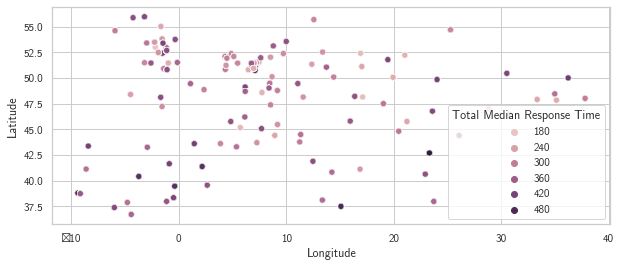

In [156]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Total Median Response Time", data=df_paper[ (df_paper["Experiment"] == "cloud") & (df_paper["Type"] == "GET") & (df_paper["Name"] == "/public/") ])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


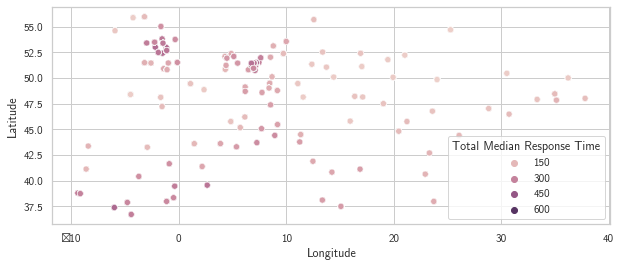

In [157]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Total Median Response Time", data=df_paper[ (df_paper["Experiment"] == "sat") & (df_paper["Type"] == "GET") & (df_paper["Name"] == "/public/") ])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


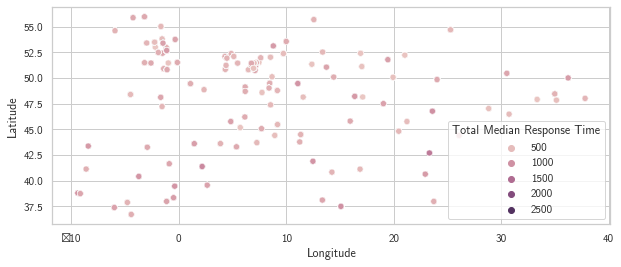

In [158]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Total Median Response Time", data=df_paper[ (df_paper["Experiment"] == "cloud") & (df_paper["Type"] == "POST") & (df_paper["Name"] == "/") ])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/tobias/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


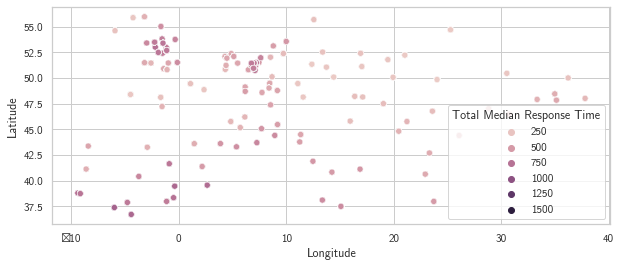

In [159]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Total Median Response Time", data=df_paper[ (df_paper["Experiment"] == "sat") & (df_paper["Type"] == "POST") & (df_paper["Name"] == "/") ])

In [160]:
test_df = df_paper[ (df_paper["Experiment"] == "sat") & (df_paper["Type"] == "POST") & (df_paper["Name"] == "/") ].groupby(["Client"]).mean()
test_df.head()

,Timestamp,50%,90%,Total Median Response Time,Total Average Response Time,Latitude,Longitude
Client,,,,,,,
ACoruna,448.701342,491.912752,521.387025,413.064877,438.157425,43.3713,-8.4188
Alicante,448.517897,904.049217,927.102908,629.205817,798.957011,38.3453,-0.4831
Amsterdam,448.418813,508.656215,597.301232,366.394177,506.775842,52.3667,4.8833
Antwerp,448.767077,471.422172,504.210526,322.754759,406.187441,51.2206,4.4003
Athens,448.929530,520.782998,539.295302,475.827740,473.654991,37.9842,23.7281


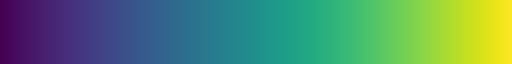

In [161]:
sns.color_palette("viridis", as_cmap=True)

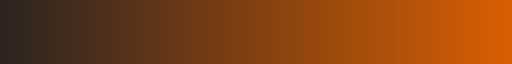

In [162]:
sns.dark_palette("#d95f02", as_cmap=True)

<ipython-input-163-3b2485e28dcf>:3: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': cartopy.crs.TransverseMercator(32)})
/usr/local/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated a

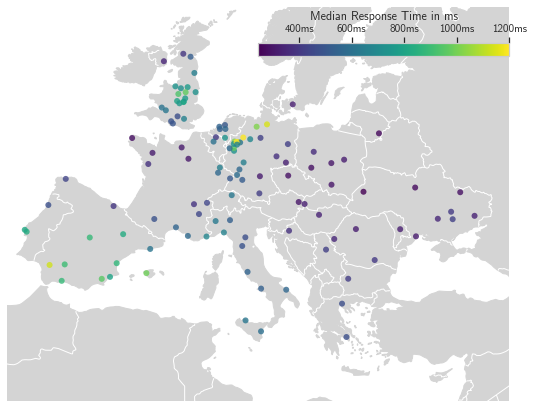

In [163]:
cmap = sns.color_palette("viridis", as_cmap=True)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': cartopy.crs.TransverseMercator(32)})
# ax = plt.axes(projection=ccrs.EuroPP())
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1, edgecolor=("#FFFFFF"))
#ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
# ax.gridlines()
ax.set_extent ((-7.5, 40, 33, 59), cartopy.crs.PlateCarree())
#ax.scatter(x=test_df["Longitude"], y=test_df["Latitude"], cmap='Greens', c=test_df["Total Median Response Time"], transform=ccrs.PlateCarree())
sns.scatterplot(ax=ax, data=test_df, x="Longitude", y="Latitude",hue="Total Average Response Time", palette=cmap, transform=ccrs.PlateCarree(), zorder=10, linewidth=0, alpha=0.8)

norm = plt.Normalize(max(test_df["Total Average Response Time"]), min(test_df["Total Average Response Time"]))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm, location='top', label="Median Response Time in ms", shrink=0.5, pad=-0.1, anchor=(1, 1))
cbar.ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%dms'))
ax.axis('off')
plt.show()
# plt.show()

In [166]:
map_df = df_paper[ ((df_paper["Name"] == "/public/") & (df_paper["Type"] == "GET")) | ((df_paper["Name"] == "/") & (df_paper["Type"] == "POST")) ].groupby(["Client", "Experiment", "Type", "Name"], as_index=False).median()
map_df

,Client,Experiment,Type,Name,Timestamp,50%,90%,Total Median Response Time,Total Average Response Time,Latitude,Longitude
0,ACoruna,cloud,GET,/public/,449.0,590.0,700.0,380.0,534.589744,43.3713,-8.4188
1,ACoruna,cloud,POST,/,449.0,0.0,0.0,840.0,1292.162791,43.3713,-8.4188
2,ACoruna,sat,GET,/public/,448.5,210.0,280.0,160.0,175.199700,43.3713,-8.4188
3,ACoruna,sat,POST,/,448.5,520.0,530.0,420.0,448.169697,43.3713,-8.4188
4,Alicante,cloud,GET,/public/,449.0,480.0,590.0,380.0,679.670659,38.3453,-0.4831
...,...,...,...,...,...,...,...,...,...,...,...
475,Zaragoza,sat,POST,/,448.5,720.0,720.0,720.0,817.734694,41.6483,-0.8830
476,Zurich,cloud,GET,/public/,449.0,390.0,530.0,290.0,630.344086,47.3786,8.5400
477,Zurich,cloud,POST,/,449.0,450.0,450.0,500.0,1068.200000,47.3786,8.5400
478,Zurich,sat,GET,/public/,448.5,290.0,515.0,220.0,310.168655,47.3786,8.5400


82.0 470.0
200.0 1100.0


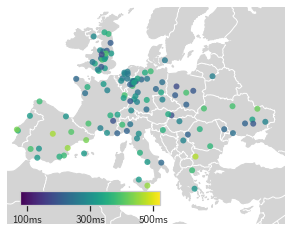

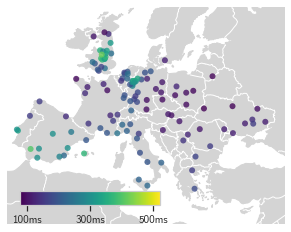

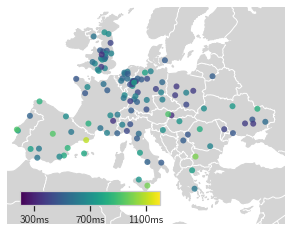

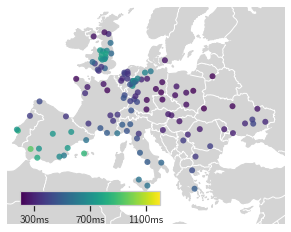

In [205]:
def make_map(df, name, vmin, vmax, ticks):
    fig, ax = plt.subplots(figsize=(5, 4), subplot_kw={'projection': cartopy.crs.TransverseMercator(32)})
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1, edgecolor=("#FFFFFF"))
    ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
    ax.set_extent ((-7.5, 40, 33, 59), cartopy.crs.PlateCarree())
    # sns.scatterplot(ax=ax, data=df, x="Longitude", y="Latitude",hue="Total Median Response Time", palette=cmap, transform=ccrs.PlateCarree(), zorder=10, linewidth=0, alpha=0.8, cmin=vmin, cmax=vmax)
    ax.scatter(x=df["Longitude"], y=df["Latitude"], cmap=cmap, c=df["Total Median Response Time"], transform=ccrs.PlateCarree(), zorder=10, linewidth=0, alpha=0.8, vmin=vmin, vmax=vmax)

    norm = plt.Normalize(vmin, vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    # ax.get_legend().remove()
    cbar = ax.figure.colorbar(sm, location='bottom', shrink=0.5, pad=-0.15, aspect=10, anchor=(0.1, 0))
    cbar.ax.xaxis.set_ticks(ticks)
    cbar.ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%dms'))
    ax.axis('off')
    plt.show()
    save_fig(ax=ax, folder="twiss_", suffix=name, format="pdf")

# align color bars between neighbouring plots
get_vmin = min(map_df[ (map_df["Type"] == "GET") ]["Total Median Response Time"])
get_vmax = max(map_df[ (map_df["Type"] == "GET") ]["Total Median Response Time"])
print(get_vmin, get_vmax)

post_vmin = min(map_df[ (map_df["Type"] == "POST") ]["Total Median Response Time"])
post_vmax = max(map_df[ (map_df["Type"] == "POST") ]["Total Median Response Time"])
print(post_vmin, post_vmax)

make_map(map_df[ (map_df["Experiment"] == "cloud") & (map_df["Type"] == "GET") ], "cloud_get", 80, 520, [100, 300, 500])
make_map(map_df[ (map_df["Experiment"] == "sat") & (map_df["Type"] == "GET") ], "sat_get", 80, 520, [100, 300, 500])

make_map(map_df[ (map_df["Experiment"] == "cloud") & (map_df["Type"] == "POST") ], "cloud_post", 200, 1200, [300, 700, 1100])
make_map(map_df[ (map_df["Experiment"] == "sat") & (map_df["Type"] == "POST") ], "sat_post", 200, 1200, [300, 700, 1100])
